In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 
from pylab import rcParams
rcParams["figure.figsize"]=30,16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
d1 = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/v11_3.xlsx", sheet_name = 'ren_ln_orig')
d1.head()

,OpportunityID_ren,accountnumber,OpportunityID,lnlexidsele,inputcheckbusname,inputcheckbusaltname,inputcheckbusaddr,inputcheckbuscity,inputcheckbusstate,inputcheckbuszip,...,model1rc5,model1rc6,model2name,model2score,model2rc1,model2rc2,model2rc3,model2rc4,model2rc5,model2rc6
0,0062M00000gYqZQQA0,LCFLN202208126653,0062M00000gYqZQQA0,1.069630e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,560.0,B078,B026,B063,B074,NaN,NaN
1,0062M00000gYSpGQAW,LCFLN202208126658,0062M00000gYSpGQAW,5.004454e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,723.0,B069,B063,B031,B066,NaN,NaN
2,0062M00000gYsQcQAK,LCFLN202208126659,0062M00000gYsQcQAK,9.550183e+10,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,702.0,B034,B052,B036,B037,NaN,NaN
3,0062M00000n0BEfQAM,LCFLN202208130965,0062M00000n0BEfQAM,1.619373e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,562.0,B078,B026,B074,B063,NaN,NaN
4,0062M00000gYTaCQAW,LCFLN202208126663,0062M00000gYTaCQAW,2.354679e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,573.0,B063,B026,B078,B074,NaN,NaN


In [ ]:
d1.shape

(3382, 392)

In [ ]:
d2 = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/v11_3.xlsx", sheet_name = 'Ren_orig')
d2.head()

,OpportunityID,CreatedDate,FundedDate,OpportunityName,Priordeal_OppID,Renewal_PreviousCollectionStatus,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,...,Industry,Industry_Group__c,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,TwoMonthAvg_AdjustedMonthlyDeposits,AdjustedMonthlyDeposits,drop_percent,Drop_category
0,0062M00000mTGVnQAO,2021-08-05 13:37:09,2021-08-10,Altitude Solutions Professional Services-New D...,0062M00000mhN0JQAU,Default,20.0,0.05,616.0,1.0,...,Services,"87 - Engineering, Accounting, Research, Manage...",0.0,NaN,-1.095377,2.337393,40417.822000,5474.06,-86.456316,Negative
1,0062M00000o96yhQAA,2022-01-14 16:05:25,2022-01-25,Dirty Dogs Self Service Dog Wash-New Deal-0114...,0062M00000ltrQ8QAI,Default,100.0,1.67,0.0,1.0,...,"Agriculture, Forestry, Fishing",07 - Agricultural Services,0.5,1.0,0.212900,0.465903,24938.318000,18952.29,-24.003342,Negative
2,0062M00000mfz6iQAA,2021-04-13 22:11:26,2021-04-19,Mana + Pua-Renewal Deal-04132021,0062M00000lvkcZQAQ,Other,100.0,0.65,513.0,1.0,...,Wholesale,51 - Wholesale Trade-Nondurable Good,2.0,2.0,0.151461,0.224922,67682.077777,46977.49,-30.590949,Negative
3,0062M00000lVi6gQAC,2020-10-01 18:18:23,2020-10-02,World Wide Windows-Renewal Deal-10012020,0062M00000jzxQuQAI,Other,100.0,1.00,517.0,1.0,...,Construction,17 - Construction Special Trade Contractors,0.0,0.0,-0.400179,0.337464,19060.590000,6068.49,-68.162108,Negative
4,0062M00000mg31dQAA,2021-04-14 17:48:32,2021-04-14,Tullus Properties-Renewal Deal-04142021,0062M00000lxWpgQAE,Other,100.0,0.50,599.0,1.0,...,"Finance, Insurance, Real Estate",65 - Real Estate,0.0,0.0,0.130666,0.050887,50438.125714,60408.48,19.767487,Positive


In [ ]:
d2.shape

(3539, 55)

In [ ]:
data = pd.merge(d1, d2[['OpportunityID','WriteOff_YN']], on = 'OpportunityID')
data.head()

,OpportunityID_ren,accountnumber,OpportunityID,lnlexidsele,inputcheckbusname,inputcheckbusaltname,inputcheckbusaddr,inputcheckbuscity,inputcheckbusstate,inputcheckbuszip,...,model1rc6,model2name,model2score,model2rc1,model2rc2,model2rc3,model2rc4,model2rc5,model2rc6,WriteOff_YN
0,0062M00000gYqZQQA0,LCFLN202208126653,0062M00000gYqZQQA0,1.069630e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,560.0,B078,B026,B063,B074,NaN,NaN,0.0
1,0062M00000gYSpGQAW,LCFLN202208126658,0062M00000gYSpGQAW,5.004454e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,723.0,B069,B063,B031,B066,NaN,NaN,0.0
2,0062M00000gYsQcQAK,LCFLN202208126659,0062M00000gYsQcQAK,9.550183e+10,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,702.0,B034,B052,B036,B037,NaN,NaN,0.0
3,0062M00000n0BEfQAM,LCFLN202208130965,0062M00000n0BEfQAM,1.619373e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,562.0,B078,B026,B074,B063,NaN,NaN,0.0
4,0062M00000gYTaCQAW,LCFLN202208126663,0062M00000gYTaCQAW,2.354679e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,573.0,B063,B026,B078,B074,NaN,NaN,1.0


In [ ]:
for i in data.columns:
  print(i)

OpportunityID_ren
accountnumber
OpportunityID
lnlexidsele
inputcheckbusname
inputcheckbusaltname
inputcheckbusaddr
inputcheckbuscity
inputcheckbusstate
inputcheckbuszip
inputcheckbusTIN
inputcheckbusphone
inputcheckbusfax
inputcheckbusnaics
inputcheckbussic
inputcheckbusage
inputcheckauthrepfirstname
inputcheckauthrepmiddlename
inputcheckauthreplastname
inputcheckauthrepaddr
inputcheckauthrepcity
inputcheckauthrepstate
inputcheckauthrepzip
inputcheckauthrepssn
inputcheckauthrepphone
inputcheckauthrepage
inputcheckauthrepdob
inputcheckauthrepdl
inputcheckauthrepdlstate
inputcheckauthrep2firstname
inputcheckauthrep2middlename
inputcheckauthrep2lastname
inputcheckauthrep2addr
inputcheckauthrep2city
inputcheckauthrep2state
inputcheckauthrep2zip
inputcheckauthrep2ssn
inputcheckauthrep2phone
inputcheckauthrep2age
inputcheckauthrep2dob
inputcheckauthrep2dl
inputcheckauthrep2dlstate
inputcheckauthrep3firstname
inputcheckauthrep3middlename
inputcheckauthrep3lastname
inputcheckauthrep3addr
input

In [ ]:
LJ_data = ['liencount',
 'lientotalamount',
 'liennewesttype',
 'lientimeoldest',
 'lientimenewest',
 'liencount03m',
 'liencount12m',
 'liencount24m',
 'liencount36m',
 'lienfedtaxcount',
 'lienfedtaxtotalamount',
 'lienforeclosurecount',
 'lienforeclosuretotalamount',
 'lientenantcount',
 'lientenanttotalamount',
 'lienmechanicscount',
 'lienmechanicstotalamount',
 'lienothercount',
 'lienothertotalamount',
 'judgmentcount',
 'judgmenttotalamount',
 'judgmentnewesttype',
 'judgmenttimeoldest',
 'judgmenttimenewest',
 'judgmentcount03m',
 'judgmentcount12m',
 'judgmentcount24m',
 'judgmentcount36m',
 'judgmentcivilcourtcount',
 'judgmentcivilcourttotalamount',
 'judgmentsmallclaimscount',
 'judgmentsmallclaimstotalamount',
 'judgmentsuitscount',
 'judgmentssuitstotalamount',
 'judgmentsothercount',
 'judgmentothertotalamount',
 'lienjudgmentdollartotal', 'WriteOff_YN', 'OpportunityID']

In [ ]:
lnj_data = data[LJ_data]
lnj_data.head()

,liencount,lientotalamount,liennewesttype,lientimeoldest,lientimenewest,liencount03m,liencount12m,liencount24m,liencount36m,lienfedtaxcount,...,judgmentcivilcourttotalamount,judgmentsmallclaimscount,judgmentsmallclaimstotalamount,judgmentsuitscount,judgmentssuitstotalamount,judgmentsothercount,judgmentothertotalamount,lienjudgmentdollartotal,WriteOff_YN,OpportunityID
0,32.0,986080.0,OX,82.0,1.0,2.0,3.0,5.0,7.0,18.0,...,40905.0,0.0,0.0,0.0,0.0,0.0,0.0,1026985.0,0.0,0062M00000gYqZQQA0
1,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0062M00000gYSpGQAW
2,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0062M00000gYsQcQAK
3,15.0,442400.0,OX,81.0,4.0,0.0,3.0,4.0,7.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,442400.0,0.0,0062M00000n0BEfQAM
4,4.0,40277.0,FX,39.0,39.0,0.0,0.0,0.0,0.0,2.0,...,6450.0,1.0,8055.0,0.0,0.0,0.0,0.0,54782.0,1.0,0062M00000gYTaCQAW


In [ ]:
lnj_data.describe()

,liencount,lientotalamount,lientimeoldest,lientimenewest,liencount03m,liencount12m,liencount24m,liencount36m,lienfedtaxcount,lienfedtaxtotalamount,...,judgmentcivilcourtcount,judgmentcivilcourttotalamount,judgmentsmallclaimscount,judgmentsmallclaimstotalamount,judgmentsuitscount,judgmentssuitstotalamount,judgmentsothercount,judgmentothertotalamount,lienjudgmentdollartotal,WriteOff_YN
count,3382.000000,3.382000e+03,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,...,3382.000000,3.382000e+03,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3.382000e+03,3382.000000
mean,0.944707,2.665170e+04,6.441159,2.791543,-0.086044,0.085452,0.291543,0.482555,0.119456,12185.651390,...,0.068598,1.498165e+04,-0.110290,136.548788,-0.136901,14.074216,-0.150207,-0.150207,4.178380e+04,0.264341
std,4.823003,2.979248e+05,18.642100,10.414027,0.590760,1.199219,1.979826,2.823114,1.595963,86312.254556,...,0.963100,1.995856e+05,0.556711,1425.607465,0.398761,403.397284,0.357327,0.357327,3.765066e+05,0.441047
min,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,0.000000
75%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,1.000000
max,77.000000,8.216095e+06,84.000000,82.000000,13.000000,17.000000,20.000000,32.000000,19.000000,999999.000000,...,12.000000,5.934682e+06,8.000000,26573.000000,4.000000,18910.000000,0.000000,0.000000,8.759472e+06,1.000000


In [ ]:
LJ_numerical_attributes = lnj_data.columns[lnj_data.dtypes!="object"]
LJ_categorical_attributes = lnj_data.columns[lnj_data.dtypes=="object"]
print("LJ_numerical_attributes :", len(LJ_numerical_attributes), "\n")
print(LJ_numerical_attributes)
print('\n')
print("LJ_categorical_attributes :", len(LJ_categorical_attributes), "\n")
print(LJ_categorical_attributes)

LJ_numerical_attributes : 36 

Index(['liencount', 'lientotalamount', 'lientimeoldest', 'lientimenewest',
       'liencount03m', 'liencount12m', 'liencount24m', 'liencount36m',
       'lienfedtaxcount', 'lienfedtaxtotalamount', 'lienforeclosurecount',
       'lienforeclosuretotalamount', 'lientenantcount',
       'lientenanttotalamount', 'lienmechanicscount',
       'lienmechanicstotalamount', 'lienothercount', 'lienothertotalamount',
       'judgmentcount', 'judgmenttotalamount', 'judgmenttimeoldest',
       'judgmenttimenewest', 'judgmentcount03m', 'judgmentcount12m',
       'judgmentcount24m', 'judgmentcount36m', 'judgmentcivilcourtcount',
       'judgmentcivilcourttotalamount', 'judgmentsmallclaimscount',
       'judgmentsmallclaimstotalamount', 'judgmentsuitscount',
       'judgmentssuitstotalamount', 'judgmentsothercount',
       'judgmentothertotalamount', 'lienjudgmentdollartotal', 'WriteOff_YN'],
      dtype='object')


LJ_categorical_attributes : 3 

Index(['liennewesttype', 

In [ ]:
lnj_data =  lnj_data.drop(['liennewesttype', 'judgmentnewesttype'], axis=1)
lnj_data.head(3)

,liencount,lientotalamount,lientimeoldest,lientimenewest,liencount03m,liencount12m,liencount24m,liencount36m,lienfedtaxcount,lienfedtaxtotalamount,...,judgmentcivilcourttotalamount,judgmentsmallclaimscount,judgmentsmallclaimstotalamount,judgmentsuitscount,judgmentssuitstotalamount,judgmentsothercount,judgmentothertotalamount,lienjudgmentdollartotal,WriteOff_YN,OpportunityID
0,32.0,986080.0,82.0,1.0,2.0,3.0,5.0,7.0,18.0,854234.0,...,40905.0,0.0,0.0,0.0,0.0,0.0,0.0,1026985.0,0.0,0062M00000gYqZQQA0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0062M00000gYSpGQAW
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0062M00000gYsQcQAK


## Checking Missing Values

In [ ]:
def missing_val(df_feature):
  print('Missing values in attribute :', '\n' )
  print(df_feature.isna().sum(), '\n')
  print('**************************************************************************************')
  print('Missing values in attribute_% :', '\n' )
  print(df_feature.isna().sum()/len(df_feature)*100, '\n')

In [ ]:
missing_val(lnj_data)

Missing values in attribute : 

liencount                         0
lientotalamount                   0
lientimeoldest                    0
lientimenewest                    0
liencount03m                      0
liencount12m                      0
liencount24m                      0
liencount36m                      0
lienfedtaxcount                   0
lienfedtaxtotalamount             0
lienforeclosurecount              0
lienforeclosuretotalamount        0
lientenantcount                   0
lientenanttotalamount             0
lienmechanicscount                0
lienmechanicstotalamount          0
lienothercount                    0
lienothertotalamount              0
judgmentcount                     0
judgmenttotalamount               0
judgmenttimeoldest                0
judgmenttimenewest                0
judgmentcount03m                  0
judgmentcount12m                  0
judgmentcount24m                  0
judgmentcount36m                  0
judgmentcivilcourtcount         

## Checking Unique Values

In [ ]:
def unique_value_counts(df_feature):
  print('Value counts of attribute :', '\n' )
  print(df_feature.value_counts())
  print('\n')
  print('**************************************************************************************')
  print('Unique number of attribute :', '\n' )
  print(df_feature.unique())
  print('\n')

In [ ]:
for col in lnj_data:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  unique_value_counts(lnj_data[col])

attribute_name : liencount
Value counts of attribute : 

 0.0     2354
-1.0      508
 1.0      164
 2.0       90
 4.0       37
 3.0       37
 6.0       25
 5.0       20
 9.0       15
 10.0      14
 8.0       13
 21.0      12
 7.0        8
 14.0       7
 18.0       7
 32.0       6
 15.0       5
 22.0       4
 25.0       4
 20.0       4
 19.0       4
 17.0       4
 38.0       4
 11.0       4
 40.0       4
 13.0       4
 39.0       3
 29.0       3
 30.0       2
 77.0       2
 16.0       2
 26.0       2
 43.0       1
 24.0       1
 48.0       1
 37.0       1
 36.0       1
 31.0       1
 34.0       1
 28.0       1
 12.0       1
 57.0       1
Name: liencount, dtype: int64


**************************************************************************************
Unique number of attribute : 

[32.  0. 15.  4.  1. -1. 40.  3.  2. 11. 38. 21. 26.  5. 20.  8. 22. 25.
  6. 36. 19.  9. 16. 18. 14. 10. 13. 29. 77. 30. 43. 17. 24. 48.  7. 37.
 39. 31. 34. 28. 12. 57.]


attribute_name : lientotalamoun

## Checking correaltion w. r. to WriteOff_YN 

In [ ]:
def corr(df_features):
  for i in lnj_data.corr()['WriteOff_YN'].sort_values().index:
    a = f'{i:50}{round(lnj_data.corr()["WriteOff_YN"][i], 3)}'
    print(a)
  print('\n')
  plt.figure(figsize = (18,8))
  plt.title('Correlation w. r. to WriteOff_YN')
  sns.countplot(round(lnj_data.corr()["WriteOff_YN"].sort_values(), 3))
  plt.xlabel('Corr w. r. to WriteOff_YN')
  plt.ylabel('No. of attributes(Count)')

lientimeoldest                                    -0.089
lientimenewest                                    -0.073
judgmenttimeoldest                                -0.061
judgmenttimenewest                                -0.055
liencount36m                                      -0.048
lienfedtaxcount                                   -0.047
lienfedtaxtotalamount                             -0.046
liencount                                         -0.045
judgmentcivilcourtcount                           -0.044
judgmentcount                                     -0.043
liencount24m                                      -0.043
judgmentsmallclaimscount                          -0.037
judgmentsmallclaimstotalamount                    -0.034
liencount12m                                      -0.032
lientotalamount                                   -0.028
judgmentcount36m                                  -0.024
liencount03m                                      -0.021
lienjudgmentdollartotal        

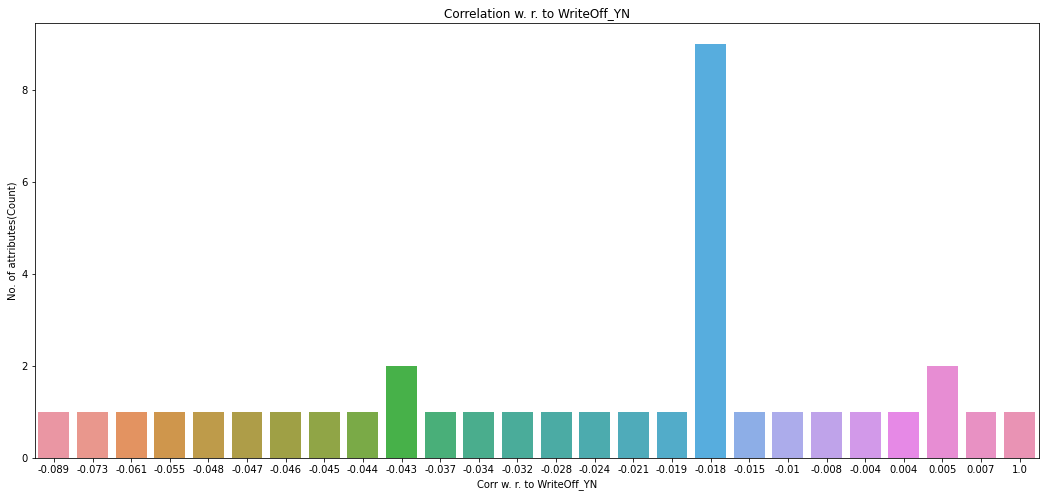

In [ ]:
corr(lnj_data)

In [ ]:
round(lnj_data.corr()["WriteOff_YN"].sort_values(), 3)

lientimeoldest                   -0.089
lientimenewest                   -0.073
judgmenttimeoldest               -0.061
judgmenttimenewest               -0.055
liencount36m                     -0.048
lienfedtaxcount                  -0.047
lienfedtaxtotalamount            -0.046
liencount                        -0.045
judgmentcivilcourtcount          -0.044
judgmentcount                    -0.043
liencount24m                     -0.043
judgmentsmallclaimscount         -0.037
judgmentsmallclaimstotalamount   -0.034
liencount12m                     -0.032
lientotalamount                  -0.028
judgmentcount36m                 -0.024
liencount03m                     -0.021
lienjudgmentdollartotal          -0.019
judgmentothertotalamount         -0.018
judgmentsothercount              -0.018
lienothertotalamount             -0.018
lienmechanicstotalamount         -0.018
lienmechanicscount               -0.018
lientenanttotalamount            -0.018
lientenantcount                  -0.018


In [ ]:
lnj_data.shape

(3382, 37)

In [ ]:
# lnj_data.drop(columns = ['lienforeclosurecount', 'lienforeclosuretotalamount', 'lientenantcount',
#                          'lientenanttotalamount', 'lienmechanicscount', 'lienmechanicstotalamount',
#                          'lienothertotalamount', 'judgmentsothercount', 'judgmentothertotalamount'], axis = 1, inplace = True)
# lnj_data.shape

In [ ]:
def lien_judgement_FE(df):
  for i in df.columns:
    if i == 'OpportunityID' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [ ]:
lien_judgement_FE(lnj_data)

In [ ]:
lnj_data

,WriteOff_YN,OpportunityID,liencount_value,liencount_flag,lientotalamount_value,lientotalamount_flag,lientimeoldest_value,lientimeoldest_flag,lientimenewest_value,lientimenewest_flag,...,judgmentsuitscount_value,judgmentsuitscount_flag,judgmentssuitstotalamount_value,judgmentssuitstotalamount_flag,judgmentsothercount_value,judgmentsothercount_flag,judgmentothertotalamount_value,judgmentothertotalamount_flag,lienjudgmentdollartotal_value,lienjudgmentdollartotal_flag
0,0.0,0062M00000gYqZQQA0,32.0,0,986080.0,0,82.0,0,1.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,1026985.0,0
1,0.0,0062M00000gYSpGQAW,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
2,0.0,0062M00000gYsQcQAK,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
3,0.0,0062M00000n0BEfQAM,15.0,0,442400.0,0,81.0,0,4.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,442400.0,0
4,1.0,0062M00000gYTaCQAW,4.0,0,40277.0,0,39.0,0,39.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,54782.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,0.0,0062M00000lTxv8QAC,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
3378,0.0,0062M00000lTxyLQAS,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
3379,1.0,0062M00000jzsJkQAI,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
3380,1.0,0062M00000l01oMQAQ,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [ ]:
round(lnj_data.corr()["WriteOff_YN"].sort_values(), 3)[:30]

lientimeoldest_value                   -0.089
lientimenewest_value                   -0.073
judgmenttimeoldest_value               -0.061
judgmenttimenewest_value               -0.055
liencount36m_value                     -0.046
lienfedtaxtotalamount_value            -0.046
lienfedtaxcount_value                  -0.044
liencount_value                        -0.044
judgmentcivilcourtcount_value          -0.042
judgmentcount_value                    -0.041
liencount24m_value                     -0.041
judgmentsmallclaimstotalamount_value   -0.034
judgmentsmallclaimscount_value         -0.034
liencount12m_value                     -0.028
lientotalamount_value                  -0.028
lienjudgmentdollartotal_value          -0.019
judgmentcount36m_value                 -0.019
liencount03m_value                     -0.012
judgmentcount24m_value                 -0.007
judgmenttotalamount_value               0.004
judgmentssuitstotalamount_value         0.005
judgmentcivilcourttotalamount_valu

In [ ]:
lnj_data.columns

Index(['WriteOff_YN', 'OpportunityID', 'liencount_value', 'liencount_flag',
       'lientotalamount_value', 'lientotalamount_flag', 'lientimeoldest_value',
       'lientimeoldest_flag', 'lientimenewest_value', 'lientimenewest_flag',
       'liencount03m_value', 'liencount03m_flag', 'liencount12m_value',
       'liencount12m_flag', 'liencount24m_value', 'liencount24m_flag',
       'liencount36m_value', 'liencount36m_flag', 'lienfedtaxcount_value',
       'lienfedtaxcount_flag', 'lienfedtaxtotalamount_value',
       'lienfedtaxtotalamount_flag', 'lienforeclosurecount_value',
       'lienforeclosurecount_flag', 'lienforeclosuretotalamount_value',
       'lienforeclosuretotalamount_flag', 'lientenantcount_value',
       'lientenantcount_flag', 'lientenanttotalamount_value',
       'lientenanttotalamount_flag', 'lienmechanicscount_value',
       'lienmechanicscount_flag', 'lienmechanicstotalamount_value',
       'lienmechanicstotalamount_flag', 'lienothercount_value',
       'lienothercount

In [ ]:
lnj_data['liencount_flag'].value_counts()

0    2874
1     508
Name: liencount_flag, dtype: int64

In [ ]:
# lnj_data.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/Lien_judgement_FE.xlsx")

In [ ]:
# lienforeclosurecount_value               NaN
# lienforeclosuretotalamount_value         NaN
# lientenantcount_value                    NaN
# lientenanttotalamount_value              NaN
# lienmechanicscount_value                 NaN
# lienmechanicstotalamount_value           NaN
# lienothertotalamount_value               NaN
# judgmentsothercount_value                NaN
# judgmentothertotalamount_value           NaN

In [ ]:
# attribute_name : lienforeclosurecount
# Value counts of attribute : 
#  0.0    2874
# -1.0     508

# attribute_name : lienforeclosuretotalamount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : lientenantcount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : lientenanttotalamount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : lienmechanicscount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : lienmechanicstotalamount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : lienothertotalamount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : judgmentsothercount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : judgmentothertotalamount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508